___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

# Keras Classification

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [50]:
np.set_printoptions(suppress=True)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer["target_names"])

['malignant' 'benign']


In [6]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [7]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     17.99000      10.38000       122.80000 1001.00000          0.11840   
1     20.57000      17.77000       132.90000 1326.00000          0.08474   
2     19.69000      21.25000       130.00000 1203.00000          0.10960   
3     11.42000      20.38000        77.58000  386.10000          0.14250   
4     20.29000      14.34000       135.10000 1297.00000          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710        0.24190   
1           0.07864         0.08690              0.07017        0.18120   
2           0.15990         0.19740              0.12790        0.20690   
3           0.28390         0.24140              0.10520        0.25970   
4           0.13280         0.19800              0.10430        0.18090   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...      25.38000       17.33000        184.60000   
1                 0.05667  ...      24.99000       23.41000        158.80000   
2                 0.05999  ...      23.57000       25.53000        152.50000   
3                 0.09744  ...      14.91000       26.50000         98.87000   
4                 0.05883  ...      22.54000       16.67000        152.20000   

   worst area  worst smoothness  worst compactness  worst concavity  \
0  2019.00000           0.16220            0.66560          0.71190   
1  1956.00000           0.12380            0.18660          0.24160   
2  1709.00000           0.14440            0.42450          0.45040   
3   567.70000           0.20980            0.86630          0.68690   
4  1575.00000           0.13740            0.20500          0.40000   

   worst concave points  worst symmetry  worst fractal dimension  
0               0.26540         0.46010                  0.11890  
1               0.18600         0.27500                  0.08902  
2               0.24300         0.36130                  0.08758  
3               0.25750         0.66380                  0.17300  
4               0.16250         0.23640                  0.07678  

[5 rows x 30 columns]

In [11]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()

Cancer
0       0
1       0
2       0
3       0
4       0

In [14]:
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     17.99000      10.38000       122.80000 1001.00000          0.11840   
1     20.57000      17.77000       132.90000 1326.00000          0.08474   
2     19.69000      21.25000       130.00000 1203.00000          0.10960   
3     11.42000      20.38000        77.58000  386.10000          0.14250   
4     20.29000      14.34000       135.10000 1297.00000          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710        0.24190   
1           0.07864         0.08690              0.07017        0.18120   
2           0.15990         0.19740              0.12790        0.20690   
3           0.28390         0.24140              0.10520        0.25970   
4           0.13280         0.19800              0.10430        0.18090   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871       1.09500        0.90530          8.58900   
1                 0.05667       0.54350        0.73390          3.39800   
2                 0.05999       0.74560        0.78690          4.58500   
3                 0.09744       0.49560        1.15600          3.44500   
4                 0.05883       0.75720        0.78130          5.43800   

   area error  smoothness error  compactness error  concavity error  \
0   153.40000           0.00640            0.04904          0.05373   
1    74.08000           0.00522            0.01308          0.01860   
2    94.03000           0.00615            0.04006          0.03832   
3    27.23000           0.00911            0.07458          0.05661   
4    94.44000           0.01149            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                  0.00619   
1               0.01340         0.01389                  0.00353   
2               0.02058         0.02250                  0.00457   
3               0.01867         0.05963                  0.00921   
4               0.01885         0.01756                  0.00511   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0      25.38000       17.33000        184.60000  2019.00000           0.16220   
1      24.99000       23.41000        158.80000  1956.00000           0.12380   
2      23.57000       25.53000        152.50000  1709.00000           0.14440   
3      14.91000       26.50000         98.87000   567.70000           0.20980   
4      22.54000       16.67000        152.20000  1575.00000           0.13740   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0            0.66560          0.71190               0.26540         0.46010   
1            0.18660          0.24160               0.18600         0.27500   
2            0.42450          0.45040               0.24300         0.36130   
3            0.86630          0.68690               0.25750         0.66380   
4            0.20500          0.40000               0.16250         0.23640   

   worst fractal dimension  Cancer  
0                  0.11890       0  
1                  0.08902       0  
2                  0.08758       0  
3                  0.17300       0  
4                  0.07678       0

## Exploratory Data Analysis and Visualization

In [15]:
df.shape

(569, 31)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
df.describe().T

count      mean       std       min       25%  \
mean radius             569.00000  14.12729   3.52405   6.98100  11.70000   
mean texture            569.00000  19.28965   4.30104   9.71000  16.17000   
mean perimeter          569.00000  91.96903  24.29898  43.79000  75.17000   
mean area               569.00000 654.88910 351.91413 143.50000 420.30000   
mean smoothness         569.00000   0.09636   0.01406   0.05263   0.08637   
mean compactness        569.00000   0.10434   0.05281   0.01938   0.06492   
mean concavity          569.00000   0.08880   0.07972   0.00000   0.02956   
mean concave points     569.00000   0.04892   0.03880   0.00000   0.02031   
mean symmetry           569.00000   0.18116   0.02741   0.10600   0.16190   
mean fractal dimension  569.00000   0.06280   0.00706   0.04996   0.05770   
radius error            569.00000   0.40517   0.27731   0.11150   0.23240   
texture error           569.00000   1.21685   0.55165   0.36020   0.83390   
perimeter error         569.00000   2.86606   2.02185   0.75700   1.60600   
area error              569.00000  40.33708  45.49101   6.80200  17.85000   
smoothness error        569.00000   0.00704   0.00300   0.00171   0.00517   
compactness error       569.00000   0.02548   0.01791   0.00225   0.01308   
concavity error         569.00000   0.03189   0.03019   0.00000   0.01509   
concave points error    569.00000   0.01180   0.00617   0.00000   0.00764   
symmetry error          569.00000   0.02054   0.00827   0.00788   0.01516   
fractal dimension error 569.00000   0.00379   0.00265   0.00089   0.00225   
worst radius            569.00000  16.26919   4.83324   7.93000  13.01000   
worst texture           569.00000  25.67722   6.14626  12.02000  21.08000   
worst perimeter         569.00000 107.26121  33.60254  50.41000  84.11000   
worst area              569.00000 880.58313 569.35699 185.20000 515.30000   
worst smoothness        569.00000   0.13237   0.02283   0.07117   0.11660   
worst compactness       569.00000   0.25427   0.15734   0.02729   0.14720   
worst concavity         569.00000   0.27219   0.20862   0.00000   0.11450   
worst concave points    569.00000   0.11461   0.06573   0.00000   0.06493   
worst symmetry          569.00000   0.29008   0.06187   0.15650   0.25040   
worst fractal dimension 569.00000   0.08395   0.01806   0.05504   0.07146   
Cancer                  569.00000   0.62742   0.48392   0.00000   0.00000   

                              50%        75%        max  
mean radius              13.37000   15.78000   28.11000  
mean texture             18.84000   21.80000   39.28000  
mean perimeter           86.24000  104.10000  188.50000  
mean area               551.10000  782.70000 2501.00000  
mean smoothness           0.09587    0.10530    0.16340  
mean compactness          0.09263    0.13040    0.34540  
mean concavity            0.06154    0.13070    0.42680  
mean concave points       0.03350    0.07400    0.20120  
mean symmetry             0.17920    0.19570    0.30400  
mean fractal dimension    0.06154    0.06612    0.09744  
radius error              0.32420    0.47890    2.87300  
texture error             1.10800    1.47400    4.88500  
perimeter error           2.28700    3.35700   21.98000  
area error               24.53000   45.19000  542.20000  
smoothness error          0.00638    0.00815    0.03113  
compactness error         0.02045    0.03245    0.13540  
concavity error           0.02589    0.04205    0.39600  
concave points error      0.01093    0.01471    0.05279  
symmetry error            0.01873    0.02348    0.07895  
fractal dimension error   0.00319    0.00456    0.02984  
worst radius             14.97000   18.79000   36.04000  
worst texture            25.41000   29.72000   49.54000  
worst perimeter          97.66000  125.40000  251.20000  
worst area              686.50000 1084.00000 4254.00000  
worst smoothness          0.13130    0.14600    0.22260  
worst compactness         0.21190    0.33910    1.05800

In [18]:
df.Cancer.value_counts()

1    357
0    212
Name: Cancer, dtype: int64

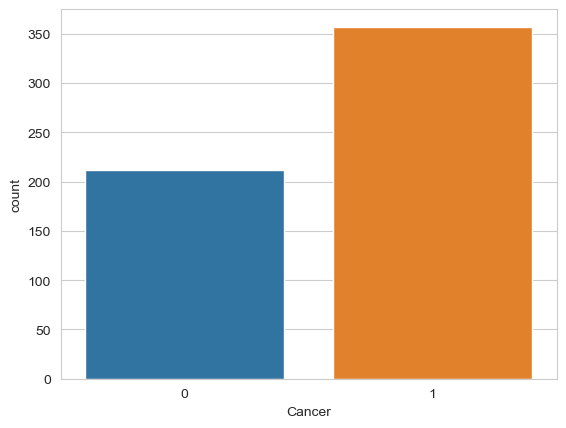

In [21]:
sns.countplot(x=df["Cancer"])
plt.show()

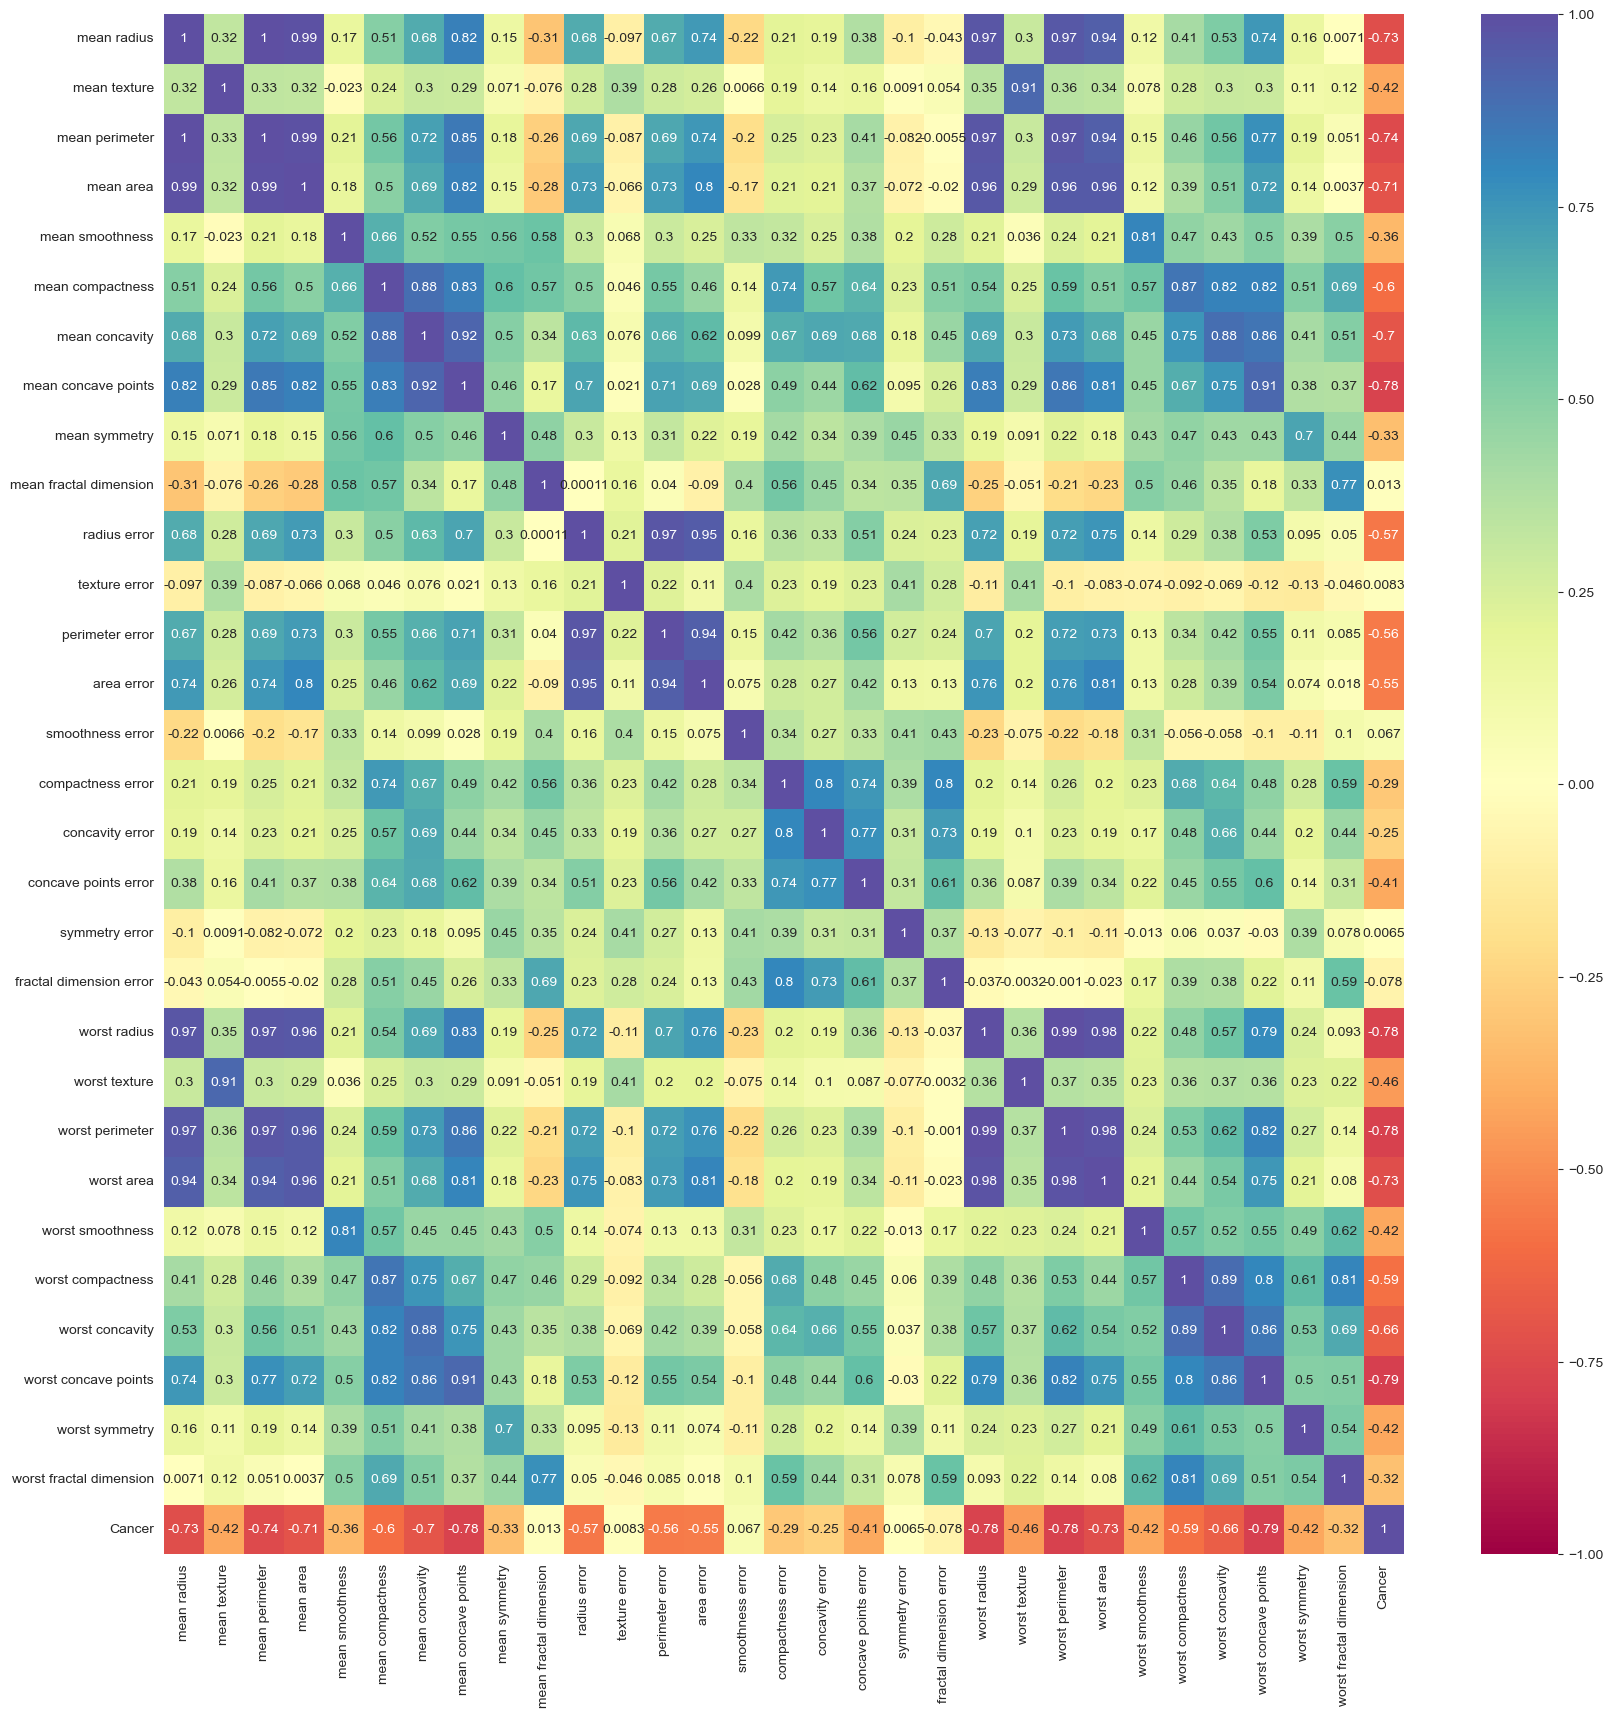

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral');

In [24]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [25]:
df=df.drop(drop_list, axis=1)

In [26]:
df.shape

(569, 25)

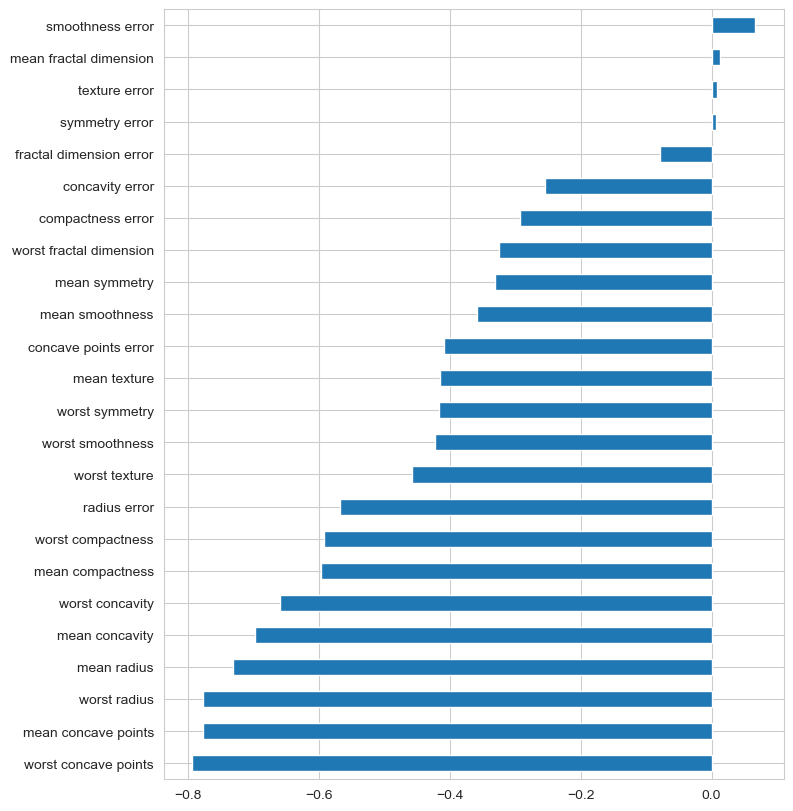

In [27]:
plt.figure(figsize = (8,10))
df.corr()['Cancer'].sort_values().drop("Cancer").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
X = df.drop('Cancer', axis=1)
y = df['Cancer']

In [30]:
seed = 42

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [35]:
X_train.shape

(512, 24)

In [36]:
X_test.shape

(57, 24)

In [38]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [39]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 1s 14ms/step - loss: 0.6778 - accuracy: 0.7674 - val_loss: 0.6622 - val_accuracy: 0.9038
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.8326 - val_loss: 0.6296 - val_accuracy: 0.9038
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.8457 - val_loss: 0.5931 - val_accuracy: 0.9231
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.8717 - val_loss: 0.5448 - val_accuracy: 0.9423
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.8761 - val_loss: 0.4792 - val_accuracy: 0.9423
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.8870 - val_loss: 0.4088 - val_accuracy: 0.9423
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8957 - val_loss: 0.3341 - val_accuracy: 0.9423
Epoch

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                900       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0 0.67776   0.76739   0.66220       0.90385
1 0.65243   0.83261   0.62961       0.90385
2 0.62040   0.84565   0.59313       0.92308
3 0.58071   0.87174   0.54483       0.94231
4 0.52753   0.87609   0.47924       0.94231

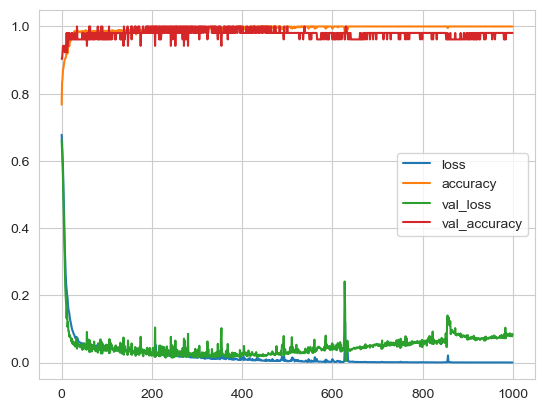

In [42]:
loss_df.plot()
plt.show()

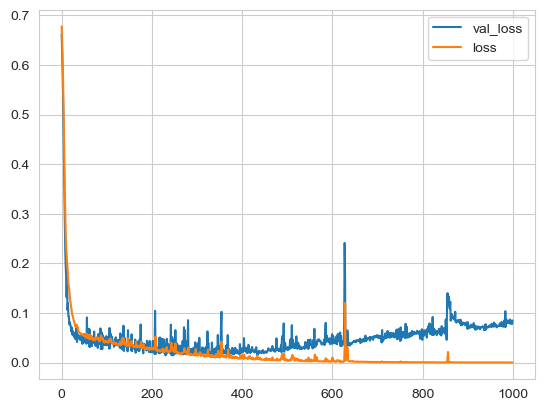

In [43]:
loss_df[['val_loss', 'loss']].plot()
plt.show()

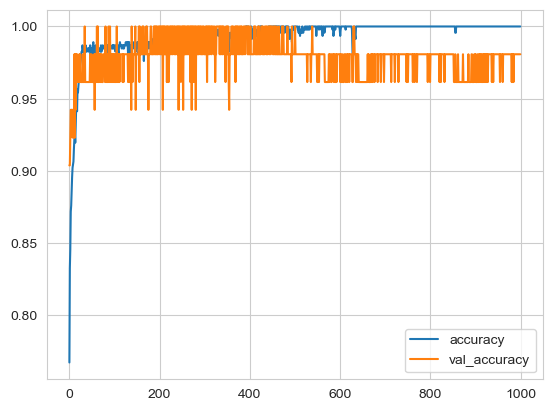

In [45]:
loss_df[['accuracy', 'val_accuracy']].plot()
plt.show()

In [46]:
model.evaluate(X_test, y_test, verbose=0)

[0.8845431804656982, 0.8947368264198303]

In [47]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.8845431804656982
accuracy :  0.8947368264198303


In [48]:
model.evaluate(X_train, y_train, verbose=0)

[0.00868066307157278, 0.998046875]

In [51]:
model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


array([[0.        ],
       [1.        ],
       [0.99999934],
       [0.        ],
       [0.00000545],
       [0.99652445],
       [0.        ],
       [1.        ],
       [0.99111694],
       [1.        ],
       [0.9999924 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.00073025],
       [0.09161332],
       [1.        ],
       [1.        ],
       [0.        ],
       [0.5667615 ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.9999999 ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.00077257],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.8513448 ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99998355],
       [1.        ],
       [0.        ],
       [0.9981758 ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.   

In [52]:
model.predict(X_test) > 0.5

2/2 [==============================] - 0s 5ms/step


array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [53]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 4ms/step
[[19  2]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.94      0.89      0.91        36

    accuracy                           0.89        57
   macro avg       0.88      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57



### EarlyStopping

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [56]:
#The patience is often set somewhere between 10 and 100 (10 or 25 is more common), 
#but it really depends on your dataset and network.

In [57]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 11ms/step - loss: 0.6778 - accuracy: 0.7674 - val_loss: 0.6622 - val_accuracy: 0.9038
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.8326 - val_loss: 0.6296 - val_accuracy: 0.9038
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.8457 - val_loss: 0.5931 - val_accuracy: 0.9231
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.8717 - val_loss: 0.5448 - val_accuracy: 0.9423
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.8761 - val_loss: 0.4792 - val_accuracy: 0.9423
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4660 - accuracy: 0.8870 - val_loss: 0.4088 - val_accuracy: 0.9423
Epoch 7/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4028 - accuracy: 0.8957 - val_loss: 0.3341 - val_accuracy: 0.9423
Epoch

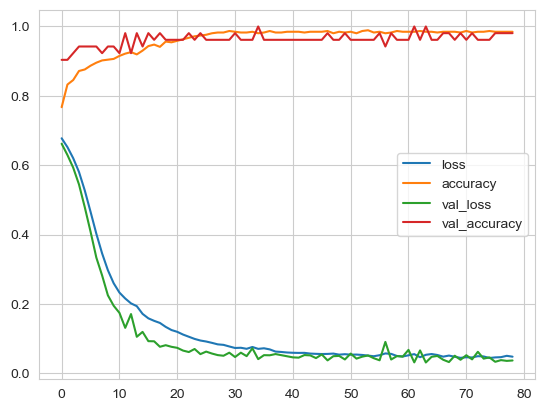

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.12801718711853027
accuracy :  0.9473684430122375


In [61]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 1ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



### learning_rate

In [62]:
from tensorflow.keras.optimizers import Adam

In [63]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

/Users/nashjr/miniconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [65]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 11ms/step - loss: 0.6293 - accuracy: 0.8022 - val_loss: 0.5245 - val_accuracy: 0.9231
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4337 - accuracy: 0.8978 - val_loss: 0.2717 - val_accuracy: 0.9231
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.2418 - accuracy: 0.9174 - val_loss: 0.1158 - val_accuracy: 0.9615
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.1680 - accuracy: 0.9196 - val_loss: 0.0763 - val_accuracy: 0.9808
Epoch 5/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.1679 - accuracy: 0.9304 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.9565 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.1077 - accuracy: 0.9630 - val_loss: 0.0625 - val_accuracy: 0.9615
Epoch

<AxesSubplot:>

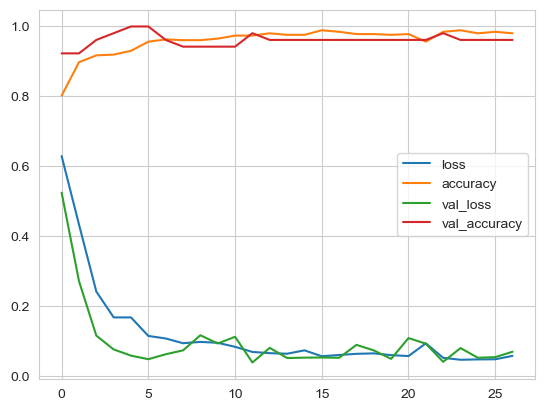

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [67]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.12057708948850632
accuracy :  0.9473684430122375


In [68]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 2ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [69]:
from tensorflow.keras.layers import Dropout

In [70]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

/Users/nashjr/miniconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [71]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
15/15 [==============================] - 1s 12ms/step - loss: 0.7003 - accuracy: 0.4913 - val_loss: 0.6870 - val_accuracy: 0.5962
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6043 - val_loss: 0.6850 - val_accuracy: 0.5385
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.6217 - val_loss: 0.6816 - val_accuracy: 0.5385
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.6543 - val_loss: 0.6743 - val_accuracy: 0.5385
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.6500 - val_loss: 0.6635 - val_accuracy: 0.6154
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.6848 - val_loss: 0.6502 - val_accuracy: 0.6538
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.7174 - val_loss: 0.6271 - val_accuracy: 0.8654
Epoch

<AxesSubplot:>

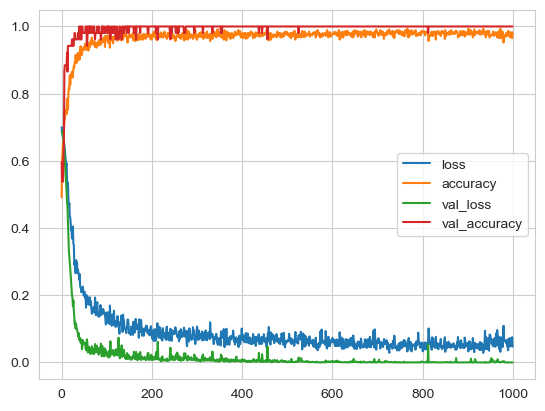

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.21266819536685944
accuracy :  0.9298245906829834


In [74]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 2ms/step
[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [75]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [76]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [77]:
classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

/var/folders/g7/dmq7zwdj7r134qj38_xjq9h80000gn/T/ipykernel_7274/837344658.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)


2/2 [==============================] - 0s 2ms/step


test_accuracy  test_precision  test_recall  test_f1
1         0.94231         0.96667      0.93548  0.95082
2         1.00000         1.00000      1.00000  1.00000
3         0.98039         0.97222      1.00000  0.98592
4         1.00000         1.00000      1.00000  1.00000
5         0.90196         0.89189      0.97059  0.92958
6         0.96078         0.97059      0.97059  0.97059
7         0.98039         0.97059      1.00000  0.98507
8         1.00000         1.00000      1.00000  1.00000
9         1.00000         1.00000      1.00000  1.00000
10        0.96078         0.92593      1.00000  0.96154

In [78]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

score_mean  score_std
acc     0.97266    0.03216
pre     0.96979    0.03599
rec     0.98767    0.02204
f1      0.97835    0.02462

## GridSearchCV

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [79]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [80]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [81]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [82]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/var/folders/g7/dmq7zwdj7r134qj38_xjq9h80000gn/T/ipykernel_7274/3917444551.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
2022-09-17 18:18:46.352087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-17 18:18:46.352610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX

Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
Epoch 1/200
13/13 [==============================] - 2s 43ms/step - loss: 0.6813 - accuracy: 0.7440 - val_loss: 0.6727 - val_accuracy: 0.7174
Epoch 2/200
13/13 [==============================] - 2s 42ms/step - loss: 0.6800 - accuracy: 0.7415 - val_loss: 0.6645 - val_accuracy: 0.8936
Epoch 2/200
Epoch 2/200
13/13 [==============================] - 2s 40ms/step - loss: 0.6800 - accuracy: 0.7778 - val_loss: 0.6684 - val_accuracy: 0.9149
Epoch 2/200
13/13 [==============================] - 2s 47ms/step - loss: 0.6809 - accuracy: 0.7512 - val_loss: 0.6679 - val_accuracy: 0.9149
Epoch 2/200
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6613 - accuracy: 0.8116 - val_loss: 0.6465 - val_accuracy: 0.8261
Epoch 3/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6621 - accuracy: 0.8116 - val_loss: 0.6455 - val_accuracy: 0.8261
Epoch 3/200
13/13 [=======================

 - val_accuracy: 0.9348
Epoch 51/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6853 - accuracy: 0.7440 - val_loss: 0.6878 - val_accuracy: 0.5957
Epoch 109/200
13/13 [==============================] - 0s 11ms/step - loss: 0.1145 - accuracy: 0.9589 - val_loss: 0.0821 - val_accuracy: 0.9362
Epoch 24/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6861 - accuracy: 0.7271 - val_loss: 0.6865 - val_accuracy: 0.7021
Epoch 72/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0596 - accuracy: 0.9831 - val_loss: 0.0702 - val_accuracy: 0.9565
Epoch 51/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1090 - accuracy: 0.9662 - val_loss: 0.0710 - val_accuracy: 0.9574
Epoch 25/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0549 - accuracy: 0.9807 - val_loss: 0.0395 - val_accuracy: 1.0000
Epoch 52/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6861 - accuracy: 0.7271 - val_loss: 0.6865 - v

13/13 [==============================] - 0s 10ms/step - loss: 0.0534 - accuracy: 0.9879 - val_loss: 0.0686 - val_accuracy: 0.9348
Epoch 54/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0571 - accuracy: 0.9807 - val_loss: 0.0728 - val_accuracy: 0.9565
Epoch 54/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6852 - accuracy: 0.7440 - val_loss: 0.6878 - val_accuracy: 0.5957
Epoch 112/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6861 - accuracy: 0.7295 - val_loss: 0.6865 - val_accuracy: 0.7021
Epoch 75/200
13/13 [==============================] - 0s 13ms/step - loss: 0.6848 - accuracy: 0.7295 - val_loss: 0.6872 - val_accuracy: 0.5957
Epoch 136/200
13/13 [==============================] - 0s 10ms/step - loss: 0.1002 - accuracy: 0.9710 - val_loss: 0.0648 - val_accuracy: 0.9574
Epoch 28/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0556 - accuracy: 0.9807 - val_loss: 0.0683 - val_accuracy: 0.9348
Epoch 55/200

Epoch 178/200
Epoch 12/200
Epoch 141/200
13/13 [==============================] - 0s 8ms/step - loss: 0.2423 - accuracy: 0.9227 - val_loss: 0.1827 - val_accuracy: 0.9362
Epoch 12/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.7464 - val_loss: 0.6852 - val_accuracy: 0.7021
Epoch 8/200
Epoch 179/200
13/13 [==============================] - 0s 8ms/step - loss: 0.2154 - accuracy: 0.9251 - val_loss: 0.1425 - val_accuracy: 0.9787
Epoch 13/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.7560 - val_loss: 0.6862 - val_accuracy: 0.6596
Epoch 180/200
13/13 [==============================] - 0s 9ms/step - loss: 0.3693 - accuracy: 0.9010 - val_loss: 0.3095 - val_accuracy: 0.9362
Epoch 9/200
13/13 [==============================] - 0s 9ms/step - loss: 0.2051 - accuracy: 0.9203 - val_loss: 0.1241 - val_accuracy: 0.9787
Epoch 143/200
Epoch 14/200
13/13 [==============================] - 0s 9ms/step - loss: 0.2015 - accuracy: 

13/13 [==============================] - 0s 11ms/step - loss: 0.6374 - accuracy: 0.8502 - val_loss: 0.6165 - val_accuracy: 0.8511
Epoch 4/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.7464 - val_loss: 0.6844 - val_accuracy: 0.7234
Epoch 181/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0482 - accuracy: 0.9879 - val_loss: 0.0663 - val_accuracy: 0.9574
Epoch 52: early stopping
13/13 [==============================] - 0s 8ms/step - loss: 0.1184 - accuracy: 0.9589 - val_loss: 0.0718 - val_accuracy: 0.9574
Epoch 24/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0415 - accuracy: 0.9903 - val_loss: 0.0548 - val_accuracy: 0.9574
Epoch 52/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6015 - accuracy: 0.8551 - val_loss: 0.5706 - val_accuracy: 0.9149
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6839 - accuracy: 0.7464 - val_loss: 0.6844 - val_accuracy: 0.7234
Epoch 4

13/13 [==============================] - 0s 7ms/step - loss: 0.0934 - accuracy: 0.9758 - val_loss: 0.0620 - val_accuracy: 0.9574
Epoch 30/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2882 - accuracy: 0.8937 - val_loss: 0.2253 - val_accuracy: 0.9362
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0505 - val_accuracy: 0.9574
Epoch 58/200
13/13 [==============================] - 0s 7ms/step - loss: 0.5547 - accuracy: 0.8720 - val_loss: 0.5284 - val_accuracy: 0.8511
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.7464 - val_loss: 0.6843 - val_accuracy: 0.7234
Epoch 188/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0913 - accuracy: 0.9807 - val_loss: 0.0669 - val_accuracy: 0.9574
Epoch 54/200
Epoch 31/200
13/13 [==============================] - 0s 9ms/step - loss: 0.2574 - accuracy: 0.9130 - val_loss: 0.2009 - val_accuracy: 0.9362
Epoch 

13/13 [==============================] - 0s 8ms/step - loss: 0.1998 - accuracy: 0.9155 - val_loss: 0.1338 - val_accuracy: 0.9348
Epoch 7/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 104/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0605 - accuracy: 0.9855 - val_loss: 0.0574 - val_accuracy: 0.9565
Epoch 21/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0582 - accuracy: 0.9831 - val_loss: 0.0682 - val_accuracy: 0.9574
Epoch 56/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1613 - accuracy: 0.9444 - val_loss: 0.0766 - val_accuracy: 0.9783
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0583 - accuracy: 0.9855 - val_loss: 0.0483 - val_accuracy: 0.9783
Epoch 22/200
13/13 [==============================] - 0s 10ms/step - loss: 0.1427 - accuracy: 0.9420 - val_loss: 0.0745 - val_accuracy: 0.9787
Epoch 9/200
13/13 

13/13 [==============================] - 0s 9ms/step - loss: 0.0515 - accuracy: 0.9807 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 30/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0583 - accuracy: 0.9855 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 59/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0731 - accuracy: 0.9783 - val_loss: 0.0621 - val_accuracy: 0.9574
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0837 - accuracy: 0.9686 - val_loss: 0.0478 - val_accuracy: 0.9783
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0605 - accuracy: 0.9807 - val_loss: 0.0502 - val_accuracy: 0.9783
Epoch 31/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0578 - accuracy: 0.9855 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 60/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0256 - val_accuracy: 0.9787
Epoch 114/200
13/1

13/13 [==============================] - 0s 8ms/step - loss: 0.0746 - accuracy: 0.9758 - val_loss: 0.0769 - val_accuracy: 0.9574
Epoch 29/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0409 - accuracy: 0.9879 - val_loss: 0.0307 - val_accuracy: 0.9787
Epoch 71/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 0.9903 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 49/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 0.9903 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 47/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0640 - accuracy: 0.9783 - val_loss: 0.0444 - val_accuracy: 1.0000
Epoch 30/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0474 - val_accuracy: 0.9787
Epoch 72/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0400 - accuracy: 0.9855 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 133/200
13/13

Epoch 157/200
13/13 [==============================] - 0s 11ms/step - loss: 0.1234 - accuracy: 0.9517 - val_loss: 0.0632 - val_accuracy: 0.9787
Epoch 10/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9928 - val_loss: 0.0556 - val_accuracy: 0.9574
Epoch 74/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0389 - accuracy: 0.9855 - val_loss: 0.0326 - val_accuracy: 0.9787
Epoch 97/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 158/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1102 - accuracy: 0.9638 - val_loss: 0.0651 - val_accuracy: 0.9574
Epoch 11/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0357 - accuracy: 0.9879 - val_loss: 0.1306 - val_accuracy: 0.9362
Epoch 75/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0371 - accuracy: 0.9855 - val_loss: 0.0258 - val_accuracy: 1.0000
Epo

Epoch 20/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 84/200
13/13 [==============================] - 0s 7ms/step - loss: 0.2531 - accuracy: 0.9034 - val_loss: 0.1449 - val_accuracy: 0.9574
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 168/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0237 - accuracy: 0.9855 - val_loss: 0.0769 - val_accuracy: 0.9574
Epoch 85/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0624 - accuracy: 0.9783 - val_loss: 0.0800 - val_accuracy: 0.9362
Epoch 21/200
13/13 [==============================] - 0s 9ms/step - loss: 0.1965 - accuracy: 0.9275 - val_loss: 0.1336 - val_accuracy: 0.9362
Epoch 169/200
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0651 - accuracy: 0.9807 - val_loss: 0.0605 - val_accuracy: 

13/13 [==============================] - 0s 10ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0275 - val_accuracy: 0.9787
Epoch 104/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0537 - accuracy: 0.9831 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 40/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0720 - accuracy: 0.9807 - val_loss: 0.0339 - val_accuracy: 1.0000
Epoch 20/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0335 - accuracy: 0.9903 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 188/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0166 - accuracy: 0.9903 - val_loss: 0.0381 - val_accuracy: 0.9787
Epoch 26/200
Epoch 105/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0596 - accuracy: 0.9710 - val_loss: 0.0399 - val_accuracy: 0.9787
Epoch 41/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9879 - val_loss: 0.0113 - val_accuracy: 1.000

Epoch 52/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0409 - accuracy: 0.9855 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 63/200
13/13 [==============================] - 0s 7ms/step - loss: 0.3139 - accuracy: 0.8841 - val_loss: 0.2174 - val_accuracy: 0.9362
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0110 - accuracy: 0.9952 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 149/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0647 - accuracy: 0.9758 - val_loss: 0.0733 - val_accuracy: 0.9574
Epoch 34/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 0.9831 - val_loss: 0.0387 - val_accuracy: 0.9787
Epoch 64/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0709 - accuracy: 0.9783 - val_loss: 0.0491 - val_accuracy: 0.9783
Epoch 53/200
13/13 [==============================] - 0s 8ms/step - loss: 0.2571 - accuracy: 0.9082 - val_loss: 0.2106 - val_accuracy: 0.9362
Epoch

13/13 [==============================] - 0s 6ms/step - loss: 0.0794 - accuracy: 0.9734 - val_loss: 0.0483 - val_accuracy: 0.9574
Epoch 20/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2797 - accuracy: 0.9082 - val_loss: 0.2147 - val_accuracy: 0.9362
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0606 - accuracy: 0.9807 - val_loss: 0.0781 - val_accuracy: 0.9574
Epoch 42/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0323 - accuracy: 0.9879 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 100/200
13/13 [==============================] - 0s 7ms/step - loss: 0.1319 - accuracy: 0.9589 - val_loss: 0.0718 - val_accuracy: 0.9787
Epoch 11/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0780 - accuracy: 0.9734 - val_loss: 0.0451 - val_accuracy: 0.9787
Epoch 21/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2386 - accuracy: 0.9058 - val_loss: 0.1591 - val_accuracy: 0.9362
Epoch 6/200
13/13 [

13/13 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.9903 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 125/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0644 - accuracy: 0.9831 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 36/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0475 - accuracy: 0.9903 - val_loss: 0.0624 - val_accuracy: 0.9574
Epoch 46/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0511 - accuracy: 0.9831 - val_loss: 0.0383 - val_accuracy: 0.9787
Epoch 68/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0443 - accuracy: 0.9855 - val_loss: 0.0948 - val_accuracy: 0.9574
Epoch 32/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0713 - accuracy: 0.9686 - val_loss: 0.1206 - val_accuracy: 0.9574
Epoch 37/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.9928 - val_loss: 0.0983 - val_accuracy: 0.9574
Epoch 47/200
13/

13/13 [==============================] - 0s 7ms/step - loss: 0.0286 - accuracy: 0.9879 - val_loss: 0.0308 - val_accuracy: 0.9787
Epoch 70/200
13/13 [==============================] - 0s 8ms/step - loss: 0.2719 - accuracy: 0.8889 - val_loss: 0.2242 - val_accuracy: 0.9149
Epoch 105/200
13/13 [==============================] - 0s 8ms/step - loss: 0.0493 - accuracy: 0.9855 - val_loss: 0.0674 - val_accuracy: 0.9574
Epoch 73/200
13/13 [==============================] - 0s 7ms/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.0884 - val_accuracy: 0.9574
Epoch 41/200
13/13 [==============================] - 0s 9ms/step - loss: 0.0958 - accuracy: 0.9710 - val_loss: 0.0491 - val_accuracy: 1.0000
Epoch 17/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0434 - accuracy: 0.9855 - val_loss: 0.0708 - val_accuracy: 0.9574
Epoch 71/200
13/13 [==============================] - 0s 12ms/step - loss: 0.6871 - accuracy: 0.7150 - val_loss: 0.6892 - val_accuracy: 0.6087
Epoch 9/200
13/13

Epoch 23/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6798 - accuracy: 0.7657 - val_loss: 0.6809 - val_accuracy: 0.6957
Epoch 132/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6765 - accuracy: 0.7778 - val_loss: 0.6778 - val_accuracy: 0.7174
Epoch 160/200
13/13 [==============================] - 0s 15ms/step - loss: 0.6791 - accuracy: 0.7754 - val_loss: 0.6801 - val_accuracy: 0.7660
Epoch 124/200
13/13 [==============================] - 0s 14ms/step - loss: 0.6860 - accuracy: 0.7319 - val_loss: 0.6885 - val_accuracy: 0.5957
Epoch 24/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6797 - accuracy: 0.7657 - val_loss: 0.6808 - val_accuracy: 0.6957
Epoch 133/200
13/13 [==============================] - 0s 6ms/step - loss: 0.6823 - accuracy: 0.7488 - val_loss: 0.6833 - val_accuracy: 0.6809
Epoch 102/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6818 - accuracy: 0.7512 - val_loss: 0.6837 - val_accuracy: 0.6

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x171a35ab0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [68]:
grid_model.best_score_

0.9746229260935143

In [69]:
grid_model.best_params_

{'batch_size': 32,
 'learn_rate': 0.001,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [70]:
#grid_model.cv_results_

In [71]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

mean_test_score  std_test_score  rank_test_score  \
0             0.975           0.025                1   
23            0.975           0.021                1   
15            0.973           0.022                3   
3             0.971           0.022                4   
5             0.971           0.027                4   
12            0.969           0.026                6   
20            0.969           0.025                6   
16            0.969           0.034                6   
11            0.969           0.031                6   
19            0.967           0.021               10   
9             0.967           0.025               11   
1             0.965           0.024               12   
17            0.965           0.032               12   
8             0.965           0.027               12   
7             0.963           0.031               15   
4             0.963           0.028               15   
21            0.963           0.027               15   
13            0.959           0.018               18   
10            0.814           0.051               19   
22            0.785           0.058               20   
6             0.781           0.062               21   
18            0.748           0.074               22   
2             0.734           0.082               23   
14            0.722           0.081               24   

                                               params  
0   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
23  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
15  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
3   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
5   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
12  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
20  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
16  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
11  {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
19  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
9   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
1   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
17  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
8   {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
7   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
4   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
21  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
13  {'batch_size': 64, 'learn_rate': 0.001, 'optim...  
10  {'batch_size': 32, 'learn_rate': 0.005, 'optim...  
22  {'batch_size': 64, 'learn_rate': 0.005, 'optim...  
6   {'batch_size': 32, 'learn_rate': 0.003, 'optim...  
18  {'batch_size': 64, 'learn_rate': 0.003, 'optim...  
2   {'batch_size': 32, 'learn_rate': 0.001, 'optim...  
14  {'batch_size': 64, 'learn_rate': 0.001, 'optim...

Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In [72]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



## ROC (Receiver Operator Characteristics Curve) and AUC (Area Under Curve)

### for keras models

In [73]:
#plot_roc_curve(model, X_test, y_test); # it gives an error because of the Sequential model

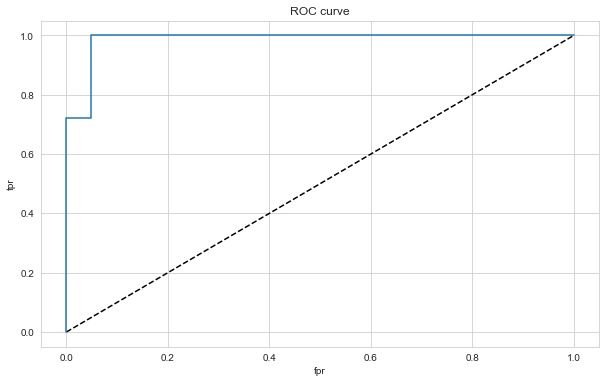

In [74]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [75]:
roc_auc_score(y_test, y_pred_proba)

0.9867724867724867

### for gridsearchcv model

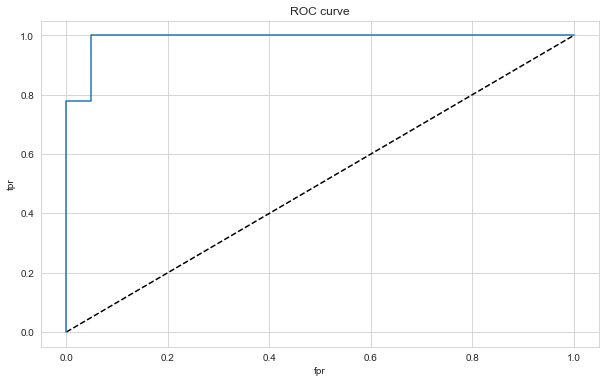

In [76]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [77]:
roc_auc_score(y_test, y_pred_proba)

0.9894179894179893

## Saving Final Model and Scaler

In [78]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [79]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [80]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [81]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
16/16 [==============================] - 1s 12ms/step - loss: 0.6777 - accuracy: 0.7480 - val_loss: 0.6615 - val_accuracy: 0.8772
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.8281 - val_loss: 0.6291 - val_accuracy: 0.9474
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6122 - accuracy: 0.8809 - val_loss: 0.5865 - val_accuracy: 0.9649
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.8867 - val_loss: 0.5298 - val_accuracy: 0.9649
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.4993 - accuracy: 0.8867 - val_loss: 0.4559 - val_accuracy: 0.9825
Epoch 6/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8867 - val_loss: 0.3815 - val_accuracy: 0.9825
Epoch 7/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3606 - accuracy: 0.8965 - val_loss: 0.3147 - val_accuracy: 0.9649
Epoch

<AxesSubplot:>

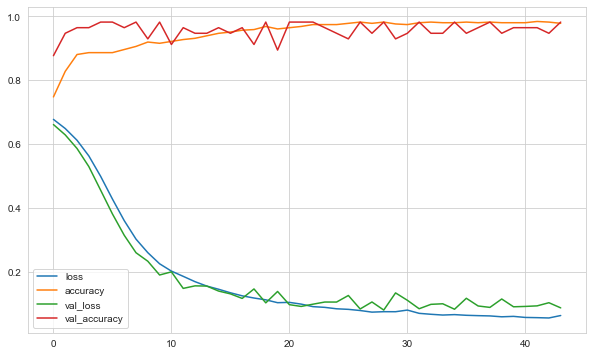

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [83]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.08040450513362885
accuracy :  0.9824561476707458


In [84]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



In [85]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [86]:
from tensorflow.keras.models import load_model

In [87]:
model_cancer = load_model('model_cancer.h5')
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [88]:
single_patient = df.drop('Cancer', axis = 1).iloc[0, :]
single_patient

mean radius  mean texture  mean smoothness  mean compactness  \
0       17.990        10.380            0.118             0.278   

   mean concavity  mean concave points  mean symmetry  mean fractal dimension  \
0           0.300                0.147          0.242                   0.079   

   radius error  texture error  smoothness error  compactness error  \
0         1.095          0.905             0.006              0.049   

   concavity error  concave points error  symmetry error  \
0            0.054                 0.016           0.030   

   fractal dimension error  worst radius  worst texture  worst smoothness  \
0                    0.006        25.380         17.330             0.162   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0              0.666            0.712                 0.265           0.460   

   worst fractal dimension  
0                    0.119

In [89]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[0.52103744, 0.0226581 , 0.68000973, 0.7920373 , 0.70313964,
        0.73111332, 0.68636364, 0.60551811, 0.35614702, 0.12046941,
        0.15929565, 0.35139844, 0.13568182, 0.30062512, 0.31164518,
        0.18304244, 0.62077552, 0.14152452, 0.61828432, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396]])

In [90]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")
#model_cancer.predict_classes(single_patient)

array([[0]])

In [91]:
df["Cancer"].iloc[0]

0

## Comparison with ML

### Logistic Regression

In [92]:
# install cuda cudnn gpu-driver
# tensorflow-gpu
# nvidia only.
from sklearn.linear_model import LogisticRegression

In [93]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___